# Mega Case Study

## Part 1 - SOM

### Importing the libraries

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=aa4e1882b4395381c2cc96cfee84d81b5f736e66531958eb380fa6559e14f9d2
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('dataset/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### Training the SOM

In [4]:
from minisom import MiniSom
som = MiniSom(x=12, y=12, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

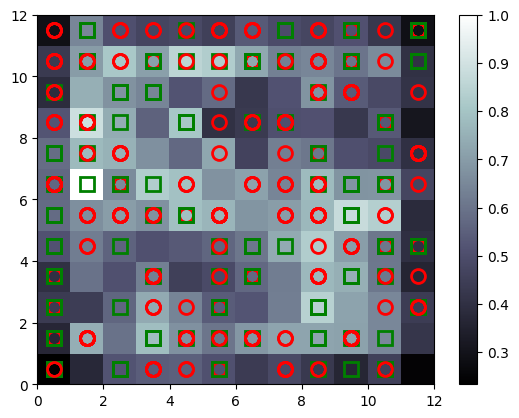

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [7]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15663942
15720529
15730287
15728906
15736510
15692430
15737542
15748986
15609823
15706268
15653147
15735572
15802106
15784526
15687765


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [8]:
customers = dataset.iloc[:, 1:].values

### Creating the Dependent Variable

In [9]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [11]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [12]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [13]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 752us/step - accuracy: 0.4019 - loss: 1.0836
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8606 - loss: 0.5243
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9663 - loss: 0.3323
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9685 - loss: 0.2518
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9769 - loss: 0.1906
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9749 - loss: 0.1597
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9828 - loss: 0.1313
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9759 - loss: 0.1320
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9786 - loss: 0.1167
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9863 - loss: 0.0905


### Predicting the test set results

In [14]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
print(y_pred)

[[1.57403560e+07 4.60326038e-02]
 [1.58137180e+07 4.60326038e-02]
 [1.56992940e+07 4.60326038e-02]
 ...
 [1.58021060e+07 1.46880493e-01]
 [1.57355720e+07 1.54738620e-01]
 [1.55941330e+07 1.66650623e-01]]
